In [1]:
import sys
from pathlib import Path
sys.path.append('../bitome-kb/')
from bitome.core import Bitome
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log,exp,inf
bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')
from feature_functions import *
from pymodulon.io import load_json_model
from pymodulon.visualization import *

/mnt/c/Users/siq00/Desktop/Lab_Project/MotifCalculation/pymodulon/pymodulon/visualization.py:3: UserWarning: The name visualization is deprecated. Please use plotting
  warnings.warn("The name visualization is deprecated. Please use plotting")


In [2]:
pd.DataFrame( zip([288,142,514,141,93],['Sigma32','Sigma38','Sigma24','Sigma28','Sigma54']),
             columns=['count','sigma factors'])

,count,sigma factors
0,288,Sigma32
1,142,Sigma38
2,514,Sigma24
3,141,Sigma28
4,93,Sigma54


In [3]:
sigmas = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue
            
        data={}   
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name  
        data.update( {'Sigma70':0,'Sigma32':0,'Sigma38':0,'Sigma24':0,'Sigma28':0,
                      'Sigma54':0, 'Sigma19':0,'unknown':0} )
        
        if tu.promoter.sigma_factors == ['unknown'] or tu.promoter.sigma_factors == []:
            data['unknown'] = 1
        else:
            for sig in tu.promoter.sigma_factors:
                data[sig] = 1
            
        sigmas.append(data)
        
sigmas_table = pd.DataFrame(sigmas)
sigmas_table.head()

,ID,gene,TU,Sigma70,Sigma32,Sigma38,Sigma24,Sigma28,Sigma54,Sigma19,unknown
0,b0001,thrL,thrLABC,1,0,0,0,0,0,0,0
1,b0001,thrL,thrL,1,0,0,0,0,0,0,0
2,b0002,thrA,thrLABC,1,0,0,0,0,0,0,0
3,b0003,thrB,thrLABC,1,0,0,0,0,0,0,0
4,b0004,thrC,thrLABC,1,0,0,0,0,0,0,0


In [5]:
#sigmas_table.to_csv('data/sigmas_table.csv')

In [4]:
prib_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
m35_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}

for p in bitome.promoters:
    for k in prib_sig.keys():
        if p.sigma_factors == [k]:
            if p.box_10_location != None:
                prib_sig[k].append(p)
            if p.box_35_location != None:
                m35_sig[k].append(p)   

In [12]:
M_prib = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
M_m35 = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for k in M_prib.keys():
    if k == 'Sigma70':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma32':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma38':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(11)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma24':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma28':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(8)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma54':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(5)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]

for k in M_prib.keys():
    for p in prib_sig[k]:
        if int(p.box_10_location.strand) == -1:
            s = complement(revstrand( str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)] ))
        else:
            s = str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)]
           
        if len(s) != len(M_prib[k]):
            continue
            
        for i in range(len(s)):
            M_prib[k][i][s[i]] = M_prib[k][i][s[i]] + 1
        
        if int(p.box_35_location.strand) == -1:
            s2 = complement(revstrand( str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)] ))
        else:
            s2 = str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)]
            
        if len(s2) != len(M_m35[k]):
            continue
            
        for i in range(len(s2)):
            M_m35[k][i][s2[i]] = M_m35[k][i][s2[i]] + 1          
            
for k in M_prib.keys():
    for i in range(len(M_prib[k])):
        SUM = M_prib[k][i]['A']+M_prib[k][i]['C']+M_prib[k][i]['G']+M_prib[k][i]['T']+4 # avoid log(0)
        for nu in ['A','C','G','T']:
            M_prib[k][i][nu] = log( (M_prib[k][i][nu]+1)/ SUM )
                    
for k in M_m35.keys():
    for i in range(len(M_m35[k])):
        SUM = M_m35[k][i]['A']+M_m35[k][i]['C']+M_m35[k][i]['G']+M_m35[k][i]['T'] + 4
        for nu in ['A','C','G','T']:
            M_m35[k][i][nu] = log( (M_m35[k][i][nu]+1)/ SUM )

# sigma 32: -10 box:CCCCAT  -35box: CTTGAAA  (consistent with book)
# sig 24: -10 box:  TGTCAAA      -35 box:TGAACTT ( -10 on textbook is TCTGAT)


# sig 28: -10 box: GCCGATAA    -35 box:CTAAAG  (consistent with book)

# sig 54: -10 box: TGCAT         -35 box: TGGCAC(consistent with book)

In [13]:
m10_seq = { 'Sigma70':'TATAAT','Sigma32':'CCCCAT','Sigma24':'TGTCAAA','Sigma28':'GCCGATAA','Sigma54':'TGCAT'}
m35_seq = { 'Sigma70':'TTGACA','Sigma32':'CTTGAAA','Sigma24':'TGAACTT','Sigma28':'CTAAAG','Sigma54':'TGGCAC'}

# -10 box

In [14]:
def pribnow( tu, signame ):
    # signame includes Sigma70,32,24,28,54.
    
    TSS = int(tu.promoter.tss)
    length = len( M_prib[signame] )
    
    if int(tu.location.strand) == -1:
        flag = False
    else:
        flag = True
        
    if flag:
        s = str(bitome.sequence)[TSS-20:TSS]
    else:
        s = complement(revstrand( str(bitome.sequence)[TSS:TSS+20] ))
        
    min_hmd_index = []
    hmind = []
    score = []
    for i in range(0,20-length+1):
        subbox=s[i:i+length]
        hmind.append( hmd( subbox, m10_seq[signame] ) )

    hmin = min(hmind)
    for i in range(0,20-length+1):
        if hmind[i] == hmin:
            min_hmd_index.append(i)
            
    for j in range( len(min_hmd_index)):
        score.append( score_motif( s[min_hmd_index[j]:min_hmd_index[j]+length], M_prib[signame] ) )
        
    max_score = max(score)
    
    for j in range ( len(min_hmd_index) ):
        if score[j] == max_score:
            index = min_hmd_index[j]
            pbox = index -20
            fstring = s[0:index].lower()+s[index:index+length]+s[index+length:].lower()
            break

    result = {signame+'_Matched_Prib':fstring,signame + '_Prib_Start':pbox,
                 signame+'_Prib_score':max_score,signame +'_Prib_hmd':hmin }
    return result

In [15]:
prib = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue

        data = {}
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TSS'] = tu.tss
        data['strand'] = int(tu.location.strand)
        for signame in m10_seq.keys():
            data.update(pribnow( tu,signame ))
            
        prib.append(data)

In [16]:
prib_table = pd.DataFrame(prib)
prib_table

,gene,TU,TSS,strand,Sigma70_Matched_Prib,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma32_Matched_Prib,Sigma32_Prib_Start,...,Sigma24_Prib_score,Sigma24_Prib_hmd,Sigma28_Matched_Prib,Sigma28_Prib_Start,Sigma28_Prib_score,Sigma28_Prib_hmd,Sigma54_Matched_Prib,Sigma54_Prib_Start,Sigma54_Prib_score,Sigma54_Prib_hmd
0,thrL,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,-13,...,-7.146291,3,tactttaACCAATATaggca,-13,-9.112461,3,TACTTtaaccaatataggca,-20,-6.991379,2
1,thrL,thrL,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,-13,...,-7.146291,3,tactttaACCAATATaggca,-13,-9.112461,3,TACTTtaaccaatataggca,-20,-6.991379,2
2,thrA,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,-13,...,-7.146291,3,tactttaACCAATATaggca,-13,-9.112461,3,TACTTtaaccaatataggca,-20,-6.991379,2
3,thrB,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,-13,...,-7.146291,3,tactttaACCAATATaggca,-13,-9.112461,3,TACTTtaaccaatataggca,-20,-6.991379,2
4,thrC,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,-13,...,-7.146291,3,tactttaACCAATATaggca,-13,-9.112461,3,TACTTtaaccaatataggca,-20,-6.991379,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,arcA,arcA,4640535,-1,ccctcttagcctgtTATGTT,-6,-4.999381,2,CCCTCTtagcctgttatgtt,-20,...,-16.573536,3,ccctcttaGCCTGTTAtgtt,-12,-9.207771,3,ccctcttAGCCTgttatgtt,-13,-6.429695,2
4028,arcA,arcA,4640599,-1,tgttaacgtgcTACAATtga,-9,-3.929721,1,tgttaacgtgCTACAAttga,-10,...,-15.441667,2,tgttaacgTGCTACAAttga,-12,-12.032986,4,tgttaacgTGCTAcaattga,-12,-2.705097,2
4029,arcA,arcA,4640688,-1,ccacgttTATTAGttgtatg,-13,-7.151015,2,CCACGTttattagttgtatg,-20,...,-11.238142,4,cCACGTTTAttagttgtatg,-19,-10.494777,4,ccacgtttattagtTGTATg,-6,-4.686726,1
4030,arcA,arcA,4640801,-1,aaggcTAAACTatttcctga,-15,-3.705595,2,aaggctaAACTATttcctga,-13,...,-6.650226,3,AAGGCTAAactatttcctga,-20,-11.871752,4,aaggctaaactatTTCCTga,-7,-6.630366,2


In [17]:
sigmas_table.head()

,ID,gene,TU,Sigma70,Sigma32,Sigma38,Sigma24,Sigma28,Sigma54,Sigma19,unknown
0,b0001,thrL,thrLABC,1,0,0,0,0,0,0,0
1,b0001,thrL,thrL,1,0,0,0,0,0,0,0
2,b0002,thrA,thrLABC,1,0,0,0,0,0,0,0
3,b0003,thrB,thrLABC,1,0,0,0,0,0,0,0
4,b0004,thrC,thrLABC,1,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Pribnow: rev_start_32')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


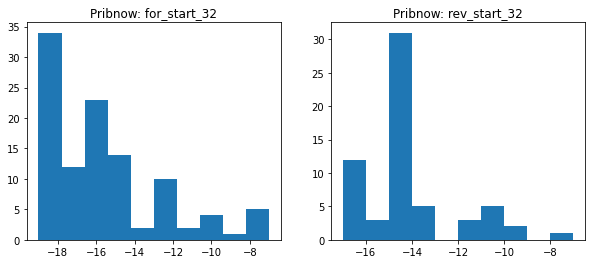

In [18]:
rev_start_32 = []
for_start_32 = []
for i in range(4032):
    if sigmas_table['Sigma32'][i] == 1:
        if prib_table['strand'][i] == 1:
            for_start_32.append(prib_table['Sigma32_Prib_Start'][i])
        else:
            rev_start_32.append(prib_table['Sigma32_Prib_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_32,bins=10)
ax0.set_title('Pribnow: for_start_32')
ax1.hist(rev_start_32,bins=10)
ax1.set_title('Pribnow: rev_start_32')

Text(0.5, 1.0, 'Pribnow: rev_start_24')

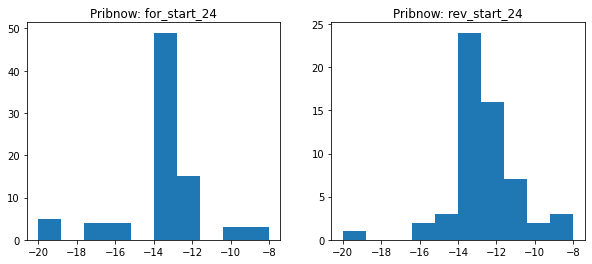

In [19]:
rev_start_24 = []
for_start_24 = []
for i in range(4032):
    if sigmas_table['Sigma24'][i] == 1:
        if prib_table['strand'][i] == 1:
            for_start_24.append(prib_table['Sigma24_Prib_Start'][i])
        else:
            rev_start_24.append(prib_table['Sigma24_Prib_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_24,bins=10)
ax0.set_title('Pribnow: for_start_24')
ax1.hist(rev_start_24,bins=10)
ax1.set_title('Pribnow: rev_start_24')

Text(0.5, 1.0, 'Pribnow: rev_start_28')

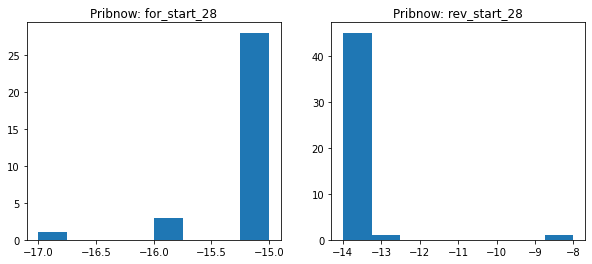

In [20]:
rev_start_28 = []
for_start_28 = []
for i in range(4032):
    if sigmas_table['Sigma28'][i] == 1:
        if prib_table['strand'][i] == 1:
            for_start_28.append(prib_table['Sigma28_Prib_Start'][i])
        else:
            rev_start_28.append(prib_table['Sigma28_Prib_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_28,bins=8)
ax0.set_title('Pribnow: for_start_28')
ax1.hist(rev_start_28,bins=8)
ax1.set_title('Pribnow: rev_start_28')

Text(0.5, 1.0, 'Pribnow: rev_start_54')

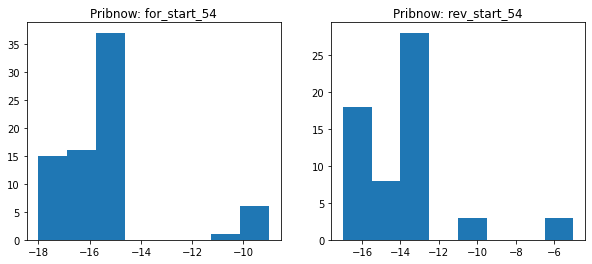

In [21]:
rev_start_54 = []
for_start_54 = []
for i in range(4032):
    if sigmas_table['Sigma54'][i] == 1:
        if prib_table['strand'][i] == 1:
            for_start_54.append(prib_table['Sigma54_Prib_Start'][i])
        else:
            rev_start_54.append(prib_table['Sigma54_Prib_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_54,bins=8)
ax0.set_title('Pribnow: for_start_54')
ax1.hist(rev_start_54,bins=8)
ax1.set_title('Pribnow: rev_start_54')

# -35 box

In [22]:
def m35( tu, signame ):
    TSS = int(tu.promoter.tss)
    length = len( M_m35[signame] )
    
    if int(tu.location.strand) == -1:
        flag = False
    else:
        flag = True
        
    if flag:
        s = str(bitome.sequence)[TSS-40:TSS-20]
    else:
        s = complement(revstrand( str(bitome.sequence)[TSS+20:TSS+40] ))
        
    min_hmd_index = []
    hmind = []
    score = []
    for i in range(0,20-length+1):
        subbox=s[i:i+length]
        hmind.append( hmd( subbox, m35_seq[signame] ) )

    hmin = min(hmind)
    for i in range(0,20-length+1):
        if hmind[i] == hmin:
            min_hmd_index.append(i)
            
    for j in range( len(min_hmd_index)):
        score.append( score_motif( s[min_hmd_index[j]:min_hmd_index[j]+length],M_m35[signame] ) )
        
    max_score = max(score)
    
    for j in range ( len(min_hmd_index) ):
        if score[j] == max_score:
            index = min_hmd_index[j]
            pbox = index -40
            fstring = s[0:index].lower()+s[index:index+length]+s[index+length:].lower()
            break

    result = { signame+'_Matched_m35':fstring, signame+'_m35_Start':pbox,
                  signame+'_m35_score':max_score, signame+'_m35_hmd':hmin}
    return result

In [23]:
M35 = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue

        data = {}
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TSS'] = tu.tss
        data['strand'] = int(tu.location.strand)
        for signame in m35_seq.keys():
            data.update( m35( tu,signame ) )
            
        M35.append(data)

M35_table = pd.DataFrame(M35)
M35_table.head()

,gene,TU,TSS,strand,Sigma70_Matched_m35,Sigma70_m35_Start,Sigma70_m35_score,Sigma70_m35_hmd,Sigma32_Matched_m35,Sigma32_m35_Start,...,Sigma24_m35_score,Sigma24_m35_hmd,Sigma28_Matched_m35,Sigma28_m35_Start,Sigma28_m35_score,Sigma28_m35_hmd,Sigma54_Matched_m35,Sigma54_m35_Start,Sigma54_m35_score,Sigma54_m35_hmd
0,thrL,thrLABC,148,1,taTTGACTtaggtcactaaa,-38,-3.662069,1,tATTGACTtaggtcactaaa,-39,...,-12.185314,2,tattgaCTTAGGtcactaaa,-34,-7.866722,2,tattgacttaGGTCACtaaa,-30,-8.45391,2
1,thrL,thrL,148,1,taTTGACTtaggtcactaaa,-38,-3.662069,1,tATTGACTtaggtcactaaa,-39,...,-12.185314,2,tattgaCTTAGGtcactaaa,-34,-7.866722,2,tattgacttaGGTCACtaaa,-30,-8.45391,2
2,thrA,thrLABC,148,1,taTTGACTtaggtcactaaa,-38,-3.662069,1,tATTGACTtaggtcactaaa,-39,...,-12.185314,2,tattgaCTTAGGtcactaaa,-34,-7.866722,2,tattgacttaGGTCACtaaa,-30,-8.45391,2
3,thrB,thrLABC,148,1,taTTGACTtaggtcactaaa,-38,-3.662069,1,tATTGACTtaggtcactaaa,-39,...,-12.185314,2,tattgaCTTAGGtcactaaa,-34,-7.866722,2,tattgacttaGGTCACtaaa,-30,-8.45391,2
4,thrC,thrLABC,148,1,taTTGACTtaggtcactaaa,-38,-3.662069,1,tATTGACTtaggtcactaaa,-39,...,-12.185314,2,tattgaCTTAGGtcactaaa,-34,-7.866722,2,tattgacttaGGTCACtaaa,-30,-8.45391,2


Text(0.5, 1.0, '-35: rev_start_32')

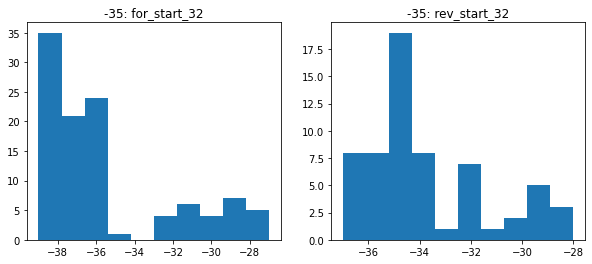

In [24]:
rev_start_32 = []
for_start_32 = []
for i in range(4032):
    if sigmas_table['Sigma32'][i] == 1:
        if M35_table['strand'][i] == 1:
            for_start_32.append(M35_table['Sigma32_m35_Start'][i])
        else:
            rev_start_32.append(M35_table['Sigma32_m35_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_32,bins=10)
ax0.set_title('-35: for_start_32')
ax1.hist(rev_start_32,bins=10)
ax1.set_title('-35: rev_start_32')

Text(0.5, 1.0, '-35: rev_start_24')

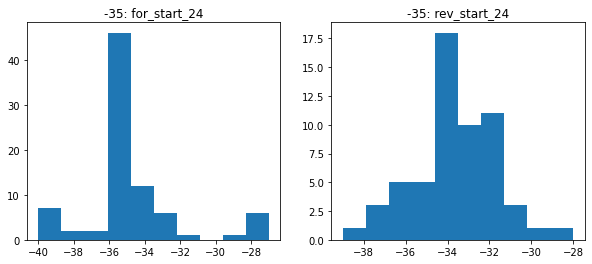

In [25]:
rev_start_24 = []
for_start_24 = []
for i in range(4032):
    if sigmas_table['Sigma24'][i] == 1:
        if M35_table['strand'][i] == 1:
            for_start_24.append(M35_table['Sigma24_m35_Start'][i])
        else:
            rev_start_24.append(M35_table['Sigma24_m35_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_24,bins=10)
ax0.set_title('-35: for_start_24')
ax1.hist(rev_start_24,bins=10)
ax1.set_title('-35: rev_start_24')

Text(0.5, 1.0, '-35: rev_start_28')

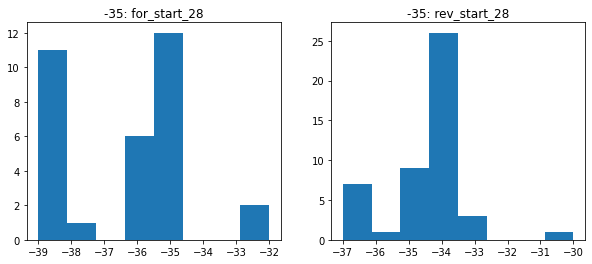

In [26]:
rev_start_28 = []
for_start_28 = []
for i in range(4032):
    if sigmas_table['Sigma28'][i] == 1:
        if M35_table['strand'][i] == 1:
            for_start_28.append(M35_table['Sigma28_m35_Start'][i])
        else:
            rev_start_28.append(M35_table['Sigma28_m35_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_28,bins=8)
ax0.set_title('-35: for_start_28')
ax1.hist(rev_start_28,bins=8)
ax1.set_title('-35: rev_start_28')

Text(0.5, 1.0, '-35: rev_start_54')

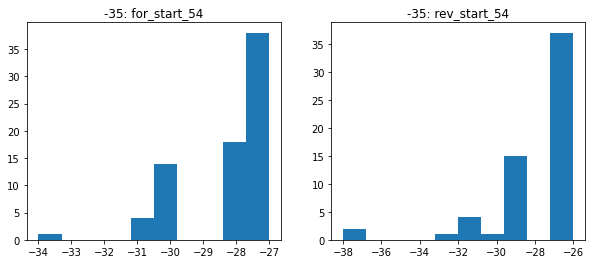

In [27]:
rev_start_54 = []
for_start_54 = []
for i in range(4032):
    if sigmas_table['Sigma54'][i] == 1:
        if M35_table['strand'][i] == 1:
            for_start_54.append(M35_table['Sigma54_m35_Start'][i])
        else:
            rev_start_54.append(M35_table['Sigma54_m35_Start'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_54,bins=10)
ax0.set_title('-35: for_start_54')
ax1.hist(rev_start_54,bins=10)
ax1.set_title('-35: rev_start_54')

### -35 start of sigma 54 is normal as they have very short spacer length (4)

# spacer between -10 and -35

In [28]:
def spacer( tu, signame ):
    TSS = int(tu.promoter.tss)
    
    if int(tu.location.strand) == -1:
        flag = False
    else:
        flag = True
        
    if flag:
        s = str(bitome.sequence)[TSS-40:TSS]
    else:
        s = complement(revstrand( str(bitome.sequence)[TSS:TSS+40] ))
    
    left = (m35(tu,signame)[ signame+'_m35_Start' ] + len( M_m35[signame] ) ) + 40
    right = pribnow(tu, signame)[signame + '_Prib_Start'] + 40
    length = right - left
    spacing = s[left:right]
    if length > 0:
        AT_ratio = ( spacing.count('A') + spacing.count('T') )/length
    else:
        AT_ratio = 0
    
    
    hepta_loca = []
    if length < 7:
        hepta_ratio = AT_ratio
    else:
        at=[]
        for i in range(0, length+1-7):
            at.append( (spacing[i:i+7].count('A') + spacing[i:i+7].count('T'))/7 )
        max_at = max(at)
        hepta_ratio = max_at
        for j in range( 0, length+1-7 ):
            if at[j] == max_at:
                hepta_loca.append( length - (j+7) )
                        
    
  
    return {signame+'_Spacer_Length': length, signame+'_Spacer_AT_ratio':AT_ratio,
             signame+'_hepta_ratio':hepta_ratio, signame+'_hepta_loca':hepta_loca}

In [29]:
spacerbox=[]

for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue

        data = {}
        data['gene'] = g.name
        data['TU'] = tu.name
        data['TSS'] = tu.tss
        data['strand'] = int(tu.location.strand)
        for signame in m35_seq.keys():
            data.update( spacer( tu, signame ) )
            
        spacerbox.append(data)

spacer_table = pd.DataFrame(spacerbox)
spacer_table.head()

,gene,TU,TSS,strand,Sigma70_Spacer_Length,Sigma70_Spacer_AT_ratio,Sigma70_hepta_ratio,Sigma70_hepta_loca,Sigma32_Spacer_Length,Sigma32_Spacer_AT_ratio,...,Sigma24_hepta_ratio,Sigma24_hepta_loca,Sigma28_Spacer_Length,Sigma28_Spacer_AT_ratio,Sigma28_hepta_ratio,Sigma28_hepta_loca,Sigma54_Spacer_Length,Sigma54_Spacer_AT_ratio,Sigma54_hepta_ratio,Sigma54_hepta_loca
0,thrL,thrLABC,148,1,24,0.708333,0.857143,"[11, 10, 9, 8, 7, 6, 5, 4]",19,0.736842,...,0.857143,"[4, 3, 2, 1, 0]",15,0.8,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.0,1.0,[]
1,thrL,thrL,148,1,24,0.708333,0.857143,"[11, 10, 9, 8, 7, 6, 5, 4]",19,0.736842,...,0.857143,"[4, 3, 2, 1, 0]",15,0.8,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.0,1.0,[]
2,thrA,thrLABC,148,1,24,0.708333,0.857143,"[11, 10, 9, 8, 7, 6, 5, 4]",19,0.736842,...,0.857143,"[4, 3, 2, 1, 0]",15,0.8,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.0,1.0,[]
3,thrB,thrLABC,148,1,24,0.708333,0.857143,"[11, 10, 9, 8, 7, 6, 5, 4]",19,0.736842,...,0.857143,"[4, 3, 2, 1, 0]",15,0.8,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.0,1.0,[]
4,thrC,thrLABC,148,1,24,0.708333,0.857143,"[11, 10, 9, 8, 7, 6, 5, 4]",19,0.736842,...,0.857143,"[4, 3, 2, 1, 0]",15,0.8,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.0,1.0,[]


In [31]:
pribnow_m35 = pd.concat([prib_table,M35_table,spacer_table], axis=1)

In [34]:
pribnow_m35.to_csv('data/pribnow_m35_allSigmas.csv')

In [5]:
pribnow_m35 = pd.read_csv('data/pribnow_m35_allSigmas.csv')

In [7]:
pribnow_m35

,Unnamed: 0,gene,TU,TSS,strand,Sigma70_Matched_Prib,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma32_Matched_Prib,...,Sigma24_hepta_ratio,Sigma24_hepta_loca,Sigma28_Spacer_Length,Sigma28_Spacer_AT_ratio,Sigma28_hepta_ratio,Sigma28_hepta_loca,Sigma54_Spacer_Length,Sigma54_Spacer_AT_ratio,Sigma54_hepta_ratio,Sigma54_hepta_loca
0,0,thrL,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,...,0.857143,"[4, 3, 2, 1, 0]",15,0.800000,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.000000,1.000000,[]
1,1,thrL,thrL,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,...,0.857143,"[4, 3, 2, 1, 0]",15,0.800000,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.000000,1.000000,[]
2,2,thrA,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,...,0.857143,"[4, 3, 2, 1, 0]",15,0.800000,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.000000,1.000000,[]
3,3,thrB,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,...,0.857143,"[4, 3, 2, 1, 0]",15,0.800000,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.000000,1.000000,[]
4,4,thrC,thrLABC,148,1,tactttaaccaaTATAGGca,-8,-7.762165,2,tactttaACCAATataggca,...,0.857143,"[4, 3, 2, 1, 0]",15,0.800000,0.857143,"[6, 5, 4, 3, 2, 1, 0]",4,1.000000,1.000000,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,4027,arcA,arcA,4640535,-1,ccctcttagcctgtTATGTT,-6,-4.999381,2,CCCTCTtagcctgttatgtt,...,0.571429,"[3, 2, 1]",18,0.333333,0.571429,[0],9,0.333333,0.428571,[0]
4028,4028,arcA,arcA,4640599,-1,tgttaacgtgcTACAATtga,-9,-3.929721,1,tgttaacgtgCTACAAttga,...,0.714286,[0],9,0.555556,0.714286,"[2, 1]",13,0.615385,0.714286,"[5, 4, 3, 2, 1]"
4029,4029,arcA,arcA,4640688,-1,ccacgttTATTAGttgtatg,-13,-7.151015,2,CCACGTttattagttgtatg,...,0.428571,"[1, 0]",7,0.571429,0.571429,[0],16,0.625000,1.000000,[2]
4030,4030,arcA,arcA,4640801,-1,aaggcTAAACTatttcctga,-15,-3.705595,2,aaggctaAACTATttcctga,...,1.000000,[0],0,0.000000,0.000000,[],17,0.764706,0.857143,"[10, 1, 0]"


Text(0.5, 1.0, 'spacer length: rev_start_32')

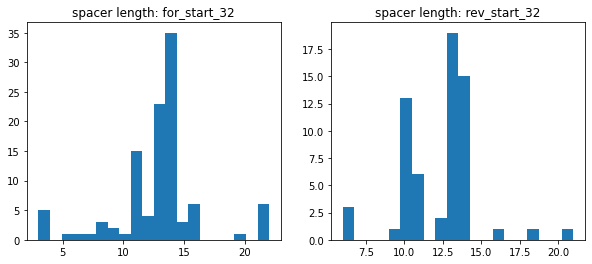

In [9]:
rev_start_32 = []
for_start_32 = []
for i in range(4032):
    if sigmas_table['Sigma32'][i] == 1:
        if pribnow_m35['strand'][i] == 1:
            for_start_32.append(pribnow_m35['Sigma32_Spacer_Length'][i])
        else:
            rev_start_32.append(pribnow_m35['Sigma32_Spacer_Length'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_32,bins=20)
ax0.set_title('spacer length: for_start_32')
ax1.hist(rev_start_32,bins=20)
ax1.set_title('spacer length: rev_start_32')

Text(0.5, 1.0, 'spacer length: rev_start_24')

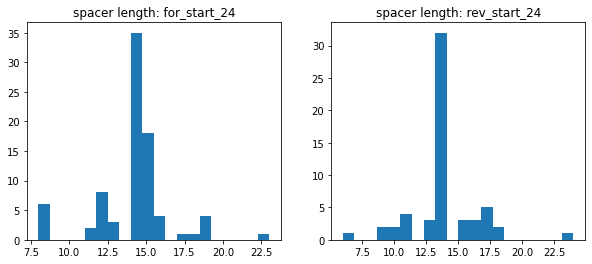

In [10]:
rev_start_24 = []
for_start_24 = []
for i in range(4032):
    if sigmas_table['Sigma24'][i] == 1:
        if pribnow_m35['strand'][i] == 1:
            for_start_24.append(pribnow_m35['Sigma24_Spacer_Length'][i])
        else:
            rev_start_24.append(pribnow_m35['Sigma24_Spacer_Length'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_24,bins=20)
ax0.set_title('spacer length: for_start_24')
ax1.hist(rev_start_24,bins=20)
ax1.set_title('spacer length: rev_start_24')

Text(0.5, 1.0, 'spacer length: rev_start_28')

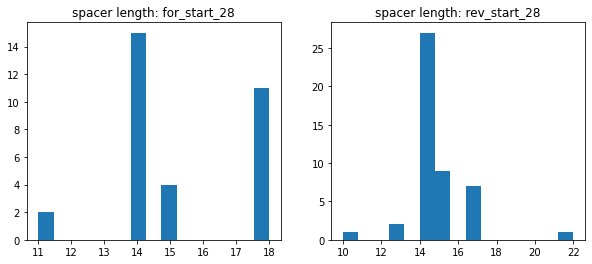

In [12]:
rev_start_28 = []
for_start_28 = []
for i in range(4032):
    if sigmas_table['Sigma28'][i] == 1:
        if pribnow_m35['strand'][i] == 1:
            for_start_28.append(pribnow_m35['Sigma28_Spacer_Length'][i])
        else:
            rev_start_28.append(pribnow_m35['Sigma28_Spacer_Length'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_28,bins=15)
ax0.set_title('spacer length: for_start_28')
ax1.hist(rev_start_28,bins=15)
ax1.set_title('spacer length: rev_start_28')

Text(0.5, 1.0, 'spacer length: rev_start_54')

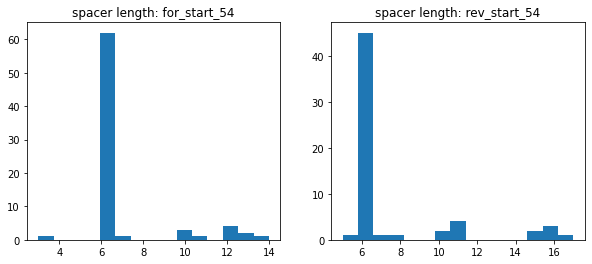

In [13]:
rev_start_54 = []
for_start_54 = []
for i in range(4032):
    if sigmas_table['Sigma54'][i] == 1:
        if pribnow_m35['strand'][i] == 1:
            for_start_54.append(pribnow_m35['Sigma54_Spacer_Length'][i])
        else:
            rev_start_54.append(pribnow_m35['Sigma54_Spacer_Length'][i])

fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax0.hist(for_start_54,bins=15)
ax0.set_title('spacer length: for_start_54')
ax1.hist(rev_start_54,bins=15)
ax1.set_title('spacer length: rev_start_54')

# linear discriminant

In [5]:
sigmas = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue
            
        data={}   
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name  
        data.update( {'Sigma70':0,'Sigma32':0,'Sigma38':0,'Sigma24':0,'Sigma28':0,
                      'Sigma54':0, 'Sigma19':0,'unknown':0} )
        
        if tu.promoter.sigma_factors == ['unknown'] or tu.promoter.sigma_factors == []:
            data['unknown'] = 1
        else:
            for sig in tu.promoter.sigma_factors:
                data[sig] = 1
            
        sigmas.append(data)
        
sigmas_table = pd.DataFrame(sigmas)
sigmas_table.head()

,ID,gene,TU,Sigma70,Sigma32,Sigma38,Sigma24,Sigma28,Sigma54,Sigma19,unknown
0,b0001,thrL,thrLABC,1,0,0,0,0,0,0,0
1,b0001,thrL,thrL,1,0,0,0,0,0,0,0
2,b0002,thrA,thrLABC,1,0,0,0,0,0,0,0
3,b0003,thrB,thrLABC,1,0,0,0,0,0,0,0
4,b0004,thrC,thrLABC,1,0,0,0,0,0,0,0


In [6]:
prib_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
m35_sig = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for p in bitome.promoters:
    for k in prib_sig.keys():
        if p.sigma_factors == [k]:
            if p.box_10_location != None:
                prib_sig[k].append(p)
            if p.box_35_location != None:
                m35_sig[k].append(p)
                
M_prib = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
M_m35 = {'Sigma70':[],'Sigma32':[],'Sigma38':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for k in M_prib.keys():
    if k == 'Sigma70':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma32':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma38':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(11)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma24':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(7)]
    elif k == 'Sigma28':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(8)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]
    elif k == 'Sigma54':
        M_prib[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(5)]
        M_m35[k] = [{'A': 0, 'C':0, 'G':0, 'T':0} for i in range(6)]

for k in M_prib.keys():
    for p in prib_sig[k]:
        if int(p.box_10_location.strand) == -1:
            s = complement(revstrand( str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)] ))
        else:
            s = str(bitome.sequence)[ int(p.box_10_location.start):int(p.box_10_location.end)]
           
        if len(s) != len(M_prib[k]):
            continue
            
        for i in range(len(s)):
            M_prib[k][i][s[i]] = M_prib[k][i][s[i]] + 1
        
        if int(p.box_35_location.strand) == -1:
            s2 = complement(revstrand( str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)] ))
        else:
            s2 = str(bitome.sequence)[ int(p.box_35_location.start):int(p.box_35_location.end)]
            
        if len(s2) != len(M_m35[k]):
            continue
            
        for i in range(len(s2)):
            M_m35[k][i][s2[i]] = M_m35[k][i][s2[i]] + 1          
            
for k in M_prib.keys():
    for i in range(len(M_prib[k])):
        SUM = M_prib[k][i]['A']+M_prib[k][i]['C']+M_prib[k][i]['G']+M_prib[k][i]['T']+4 # avoid log(0)
        for nu in ['A','C','G','T']:
            M_prib[k][i][nu] = log( (M_prib[k][i][nu]+1)/ SUM )
                    
for k in M_m35.keys():
    for i in range(len(M_m35[k])):
        SUM = M_m35[k][i]['A']+M_m35[k][i]['C']+M_m35[k][i]['G']+M_m35[k][i]['T'] + 4
        for nu in ['A','C','G','T']:
            M_m35[k][i][nu] = log( (M_m35[k][i][nu]+1)/ SUM )
            
M_prib['Sigma38'] = M_prib['Sigma38'][4:11]
m10_seq = { 'Sigma70':'TATAAT','Sigma38':'CTATACT','Sigma32':'CCCCAT','Sigma24':'TGTCAAA','Sigma28':'GCCGATAA','Sigma54':'TGCAT'}
m35_seq = { 'Sigma70':'TTGACA','Sigma38':'TTGACA','Sigma32':'CTTGAAA','Sigma24':'TGAACTT','Sigma28':'CTAAAG','Sigma54':'TGGCAC'}

In [7]:
sigma_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None:
            continue
            
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['strand'] = int(tu.location.strand)
        data['TU_length'] = len(tu.sequence)
        
        # replication strand
        data['leading'] = 0
        data['lagging'] = 0
        data['terminus'] = 0
        data[ str(g.replication_strand) ] = 1
        
        #sigmulon features ( sigma 38 excluded )
        for signame in m10_seq.keys():
            result = bitome.score_pribnow_m35( tu, signame, M_prib, M_m35,m10_seq,m35_seq)
            result.pop(signame+'_Matched_Prib')
            result.pop(signame+'_Matched_m35')
            data.update( result )
            
        sigma_feature.append(data)
        
sigma_pd = pd.DataFrame(sigma_feature)

In [8]:
X = {}
labels = {}
w = {}
for signame in m10_seq.keys():
    temp = sigma_pd[[signame + '_Prib_Start', signame + '_Prib_score',
       signame + '_Prib_hmd', signame + '_Prib_Tm', signame + '_m35_Start',
       signame + '_m35_score', signame +'_m35_hmd', signame +'_Spacer_Length',
       signame +'_Spacer_AT_ratio', signame + '_hepta_ratio']]
    X[signame] = temp.iloc[:,:].values
    labels[signame] = np.array(sigmas_table[signame])
    w[signame] = ld( X[signame], labels[signame])

In [9]:
X_ld = {}
for signame in m10_seq.keys():
    X_ld_temp = []
    X_temp = X[signame]
    labels_temp = labels[signame]
    w_temp = w[signame]
    
    for v in X_temp:
        X_ld_temp.append(  np.matmul( w_temp , v)  )
    X_ld[signame] = X_ld_temp

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


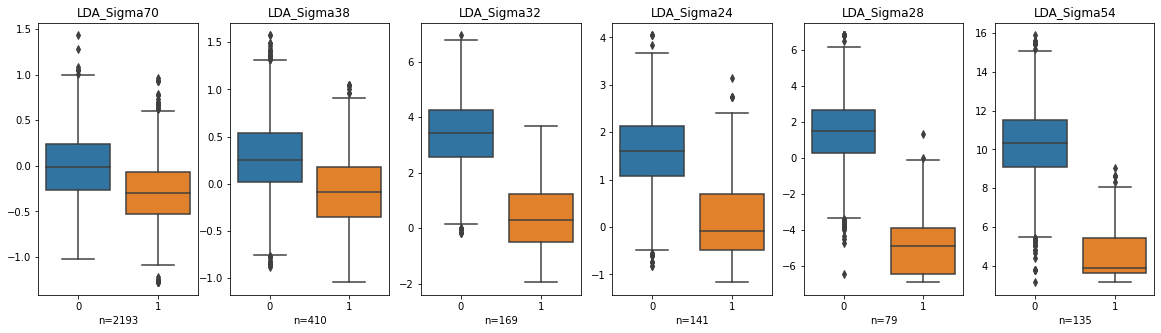

In [10]:
fig, axs = plt.subplots(1,6,figsize= (20,5))
sig_list = list(m10_seq.keys())
for i in range(6):
    signame = sig_list[i]
    sns.boxplot( labels[signame],X_ld[signame], ax = axs[i])
    axs[i].set_title('LDA_'+signame)
    axs[i].set_xlabel('n='+ str(sum(labels[signame])) )

In [10]:
print(w)

{'Sigma70': array([ 1.65064382e-02, -6.59506008e-02,  3.02672899e-01, -5.24886433e-02,
        1.71139291e-02, -5.81206469e-02,  1.50473443e-01, -6.07490918e-04,
       -6.33659058e-01,  1.83387202e-01]), 'Sigma38': array([-0.01371682, -0.20837012, -0.01447272, -0.08668739, -0.01633375,
        0.06734916, -0.07138144,  0.00261692, -0.543808  ,  0.58861234]), 'Sigma32': array([ 0.04611459, -0.27112878,  0.78284334, -0.03343359,  0.03332323,
       -0.13342375,  0.0499618 ,  0.01279136,  0.89601573, -1.3806742 ]), 'Sigma24': array([ 0.00797833, -0.11419877,  0.09339727, -0.06414143,  0.03343402,
       -0.16363185,  0.25952174, -0.02545569, -0.45804491,  0.98356359]), 'Sigma28': array([-0.03337679, -0.44776207,  0.83001936, -0.14254413,  0.0937775 ,
        0.02082157,  0.9029926 , -0.12715429, -5.67666246,  2.79836743]), 'Sigma54': array([ 0.00849921, -0.29833907,  0.19381744, -0.14867898, -0.1209861 ,
       -0.55674056,  0.08177916,  0.1294853 ,  2.10054191, -1.99187276])}


In [11]:
import ast
im_info = pd.read_csv('data/precise2_im_info_new.csv')
IM_genes = {}
for i in range(len(im_info['im_name'])):
    IM_genes[im_info['im_name'][i]] = ast.literal_eval( im_info['genes'][i] )
IM_genes.keys()

dict_keys(['CysB-1', 'HprR+CusR', 'PhoB-1', 'Fnr-1', 'TdcAR', 'Fimbriae', 'PurR-2', 'Fnr+NarL', 'GalRS', 'BtsR', 'PyrR', 'PlaR', 'RpoN+FhlA', 'RhaS', 'NanR', 'FadR', 'NrdR', 'GlcC', 'BaeR+CpxR', 'NikR', 'Isoleucine', 'RpoN+PspF', 'OxyR', 'TrpR', 'CsqR', 'LldR', 'Thiamine-1', 'PuuR', 'YcjW', 'PdhR+OmpR', 'NsrR', 'GntR', 'Fnr+NarLP', 'RcsAB', 'MalT', 'TyrR', 'Molybdopterin', 'Fnr-2', 'AtoC', 'Leucine', 'SoxS', 'Translation', 'RcnR', 'Lrp', 'Nac', 'KdpE', 'PhoB-2', 'RbsR', 'CysB-2', 'FlhDC-1', 'GatR', 'ArgR', 'GadX', 'RpoN+NtrC-1', 'XylR', 'ArcA', 'BirA', 'EvgA', 'BluR', 'LsrR', 'Zur', 'RpoE', 'Fur-1', 'PurR-1', 'ArgP', 'AllR', 'FucR', 'Fur-2', 'Mlc', 'CecR', 'Fnr+IHF+gcvB', 'YgbI', 'LexA', 'Cra', 'GlpR', 'RpoN+NtrC-2', 'PaaX', 'Oligopeptide', 'CdaR', 'RpoN+PrpR+Cra', 'FliA', 'CpxR', 'Histidine', 'RpoH', 'GadE+FliZ', 'GcvA', 'YdeO+H-NS', 'NagC', 'GutM+SrlR', 'MetJ', 'RpoS', 'CysB-3', 'FlhDC-2', 'RutR', 'PhoP', 'RyhB', 'BasR', 'NarL', 'RpoS+ArgR+RpoN', 'Crp-related-2'])

In [14]:
sigmulon= { 'Sigma70':[],'Sigma38':[],'Sigma32':[],'Sigma24':[],'Sigma28':[],'Sigma54':[]}
for i in range(len(sigmas_table['ID'])):
    for k in sigmulon.keys():
        if list(sigmas_table[k])[i] == 1:
            sigmulon[k].append(  list(sigmas_table['ID'])[i])

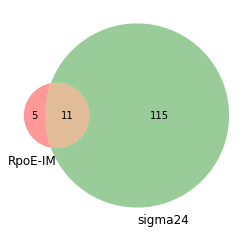

In [15]:
from matplotlib_venn import venn2
venn2([set(IM_genes['RpoE']),set(sigmulon['Sigma24'])],set_labels=('RpoE-IM','sigma24') )
plt.show()

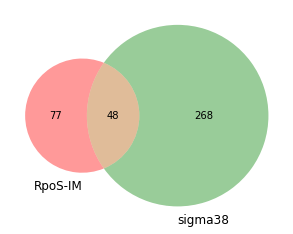

In [16]:
venn2([set(IM_genes['RpoS']),set(sigmulon['Sigma38'])],set_labels=('RpoS-IM','sigma38') )
plt.show()

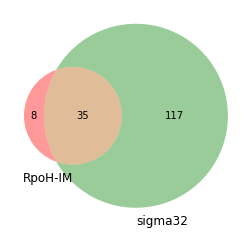

In [17]:
venn2([set(IM_genes['RpoH']),set(sigmulon['Sigma32'])],set_labels=('RpoH-IM','sigma32') )
plt.show()

In [ ]:
# w.T * x 
# better performance for smaller sigmulons
# TFs